<a href="https://colab.research.google.com/github/mihaelakri/ShoppingEyes/blob/master/ImageClassifiactionEuro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Euro classification with TensorFlow

It is very important to make a very good model to classify images in this case for euro banknotes. How we can solve this issue?

The [TensorFlow](https://www.tensorflow.org/lite/guide/model_maker) model maker library can be a excellent tool to solve that issue.

For image classification we need resources aka. images so we need computing power to analyze the pictures. To tackle that Google Colab offers Hosted Runtime from the Google Cloud for free.

## Dependencies

The crucial part of the model maker program to use and install our dependencies.
<br>
If you try to run this script on premise make sure you use pip and download and install these dependencies.

In [1]:
!pip install -q tflite-model-maker
!pip install -q matplotlib
!pip install -q numpy

     |████████████████████████████████| 616 kB 3.9 MB/s 
     |████████████████████████████████| 234 kB 52.5 MB/s 
     |████████████████████████████████| 120 kB 40.5 MB/s 
     |████████████████████████████████| 1.2 MB 45.7 MB/s 
     |████████████████████████████████| 840 kB 49.2 MB/s 
     |████████████████████████████████| 1.1 MB 46.9 MB/s 
     |████████████████████████████████| 596 kB 58.2 MB/s 
     |████████████████████████████████| 77 kB 4.5 MB/s 
     |████████████████████████████████| 87 kB 5.9 MB/s 
     |████████████████████████████████| 3.4 MB 40.7 MB/s 
     |████████████████████████████████| 1.1 MB 52.8 MB/s 
     |████████████████████████████████| 6.4 MB 24.5 MB/s 
     |████████████████████████████████| 25.3 MB 1.5 MB/s 
     |████████████████████████████████| 99 kB 7.1 MB/s 
     |████████████████████████████████| 352 kB 46.2 MB/s 
     |████████████████████████████████| 47.7 MB 67 kB/s 
     |████████████████████████████████| 462 kB 62.8 MB/s 
     |████████████████

## Import the dependencies

After the installation of the dependencies make sure you imported all the important functions and components that could be useful to make our model.

In [2]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
import matplotlib.pyplot as plt
from google.colab import files

If you run this script on premise it can be useful to use local directory and not downloading the tgz archive from the internet.

To demonstrate the model maker I used a tar file which downloaded from a webserver 

You can't just throw the pictures and the program determines what you did we used directories to sort all the types of classes that we would like to identify
<br>
<br>
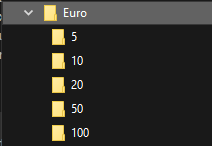


In [3]:
tf.config.experimental.list_physical_devices('GPU')
# image_path = "Your local path"
image_path = tf.keras.utils.get_file('Euro','https://web.unideb.hu/zsolt.berecz/ShoppingEyes/Euro.tgz',untar=True) # Remember the first input is the folder name which contains the "labels" aka sub folders
data = DataLoader.from_folder(image_path)

5931237376/5931225263 [==============================] - 232s 0us/step
INFO:tensorflow:Load image with size: 2118, num_label: 7, labels: 10, 100, 20, 200, 5, 50, 500.


Okay, I downloaded the pictures then what?

The next step is to train our model with the data(images) that was downloaded.

I used the default options but it can be changed for instance the algorithm method or the batch size,epoch.


In [ ]:
train_data, rest_data = data.split(0.8) # 80% training data 10 % for test and 10% for validation
#train_data, test_data = data.split(0.9)
validation_data, test_data = rest_data.split(0.5)

model = image_classifier.create(train_data)
#model = image_classifier.create(train_data, validation_data=validation_data,model_spec=model_spec.get('efficientnet_lite4'),epochs = 10,batch_size = 16) #resnet_50 default epochs = 50 and batch_size = 16
print("Evaluate the result of the model, get the loss and accuracy of the model:\n")
loss, accuracy = model.evaluate(test_data)


INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 7)                 8967      
                                                                 
Total params: 3,421,991
Trainable params: 8,967
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


51/52 [============================>.] - ETA: 12s - loss: 1.0266 - accuracy: 0.7837

And that's it!


Congratulations you can make models which classify pictures, in this case banknotes.

When the train finished the Python script exports the **.tflite** file to the directory where you started running the script.

In [ ]:
model.evaluate_tflite('model.tflite', test_data)
model.export(export_dir='.')

#Download from the Google Colab:
files.download('model.tflite') 
# just the label
# model.export(export_dir='.', export_format=ExportFormat.LABEL)

## Test the model

In [ ]:
def get_label_color(val1, val2):
    if val1 == val2:
        return 'black'
    else:
        return 'red'

def test_model():
    plt.figure(figsize=(20, 20))
    predicts = model.predict_top_k(test_data)
    for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
        ax = plt.subplot(10, 10, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image.numpy(), cmap=plt.cm.gray)

        predict_label = predicts[i][0][0]
        color = get_label_color(predict_label,test_data.index_to_label[label.numpy()])
        ax.xaxis.label.set_color(color)
        plt.xlabel('Predicted: %s' % predict_label)
        plt.show()



test_model()